### Euro dolar historic data

In [3]:
#pip install requests

In [20]:
#pip install pandas-datareader

In [70]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2000, 1, 1)
end = datetime(2021, 12, 31)
aud = web.DataReader('EUR=X', 'yahoo', start, end)

In [71]:
aud

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,0.83724,0.830560,0.83098,0.83577,0.0,0.83577
2003-12-02,0.83710,0.825830,0.83605,0.82720,0.0,0.82720
2003-12-03,0.82802,0.824400,0.82713,0.82488,0.0,0.82488
2003-12-04,0.83029,0.823450,0.82508,0.82775,0.0,0.82775
2003-12-05,0.82878,0.820280,0.82795,0.82055,0.0,0.82055
...,...,...,...,...,...,...
2021-11-16,0.88256,0.878194,0.87971,0.87978,0.0,0.87978
2021-11-17,0.88727,0.882301,0.88369,0.88330,0.0,0.88330
2021-11-18,0.88378,0.880300,0.88354,0.88330,0.0,0.88330


In [72]:
aud.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4662 entries, 2003-12-01 to 2021-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4662 non-null   float64
 1   Low        4662 non-null   float64
 2   Open       4662 non-null   float64
 3   Close      4662 non-null   float64
 4   Volume     4662 non-null   float64
 5   Adj Close  4662 non-null   float64
dtypes: float64(6)
memory usage: 255.0 KB


<AxesSubplot:xlabel='Date'>

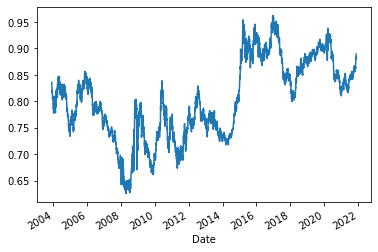

In [73]:
aud.Close.plot()

In [19]:
aud.index.min()

Timestamp('2003-12-01 00:00:00')

### Presse 

In [23]:
#pip install selenium

In [3]:
#pip install webdriver_manager

In [4]:
#from webdriver_manager.chrome import ChromeDriverManager

In [1]:
from selenium import webdriver

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains


import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
import pandas as pd

In [3]:
DRIVER_PATH = 'C:/Users/User/Downloads/geckodriver.exe'

In [4]:
driver = webdriver.Firefox(executable_path=DRIVER_PATH)

In [5]:
driver.implicitly_wait(100)

In [6]:
xpath = "/html/body/div[2]/main/div[3]/dl/div[19]/dt[90]"

In [7]:
a = driver.find_elements_by_xpath("/html/body/div[2]/main/div[3]/dl/div/dt")

In [8]:
years = [element.text for element in a]


In [9]:
len(years)

1941

In [10]:
xpath = "/html/body/div[2]/main/div[3]/dl/div[18]/dd[83]/div[2]/a"
#/html/body/div[2]/main/div[3]/dl/div/dd/div[2]/a

In [11]:
b = driver.find_elements_by_xpath("/html/body/div[2]/main/div[3]/dl/div/dd/div[2]/a")

In [12]:
urls = [element.get_attribute("href") for element in b]

In [13]:
len(urls)

1941

In [14]:
driver.get(urls[1000])

In [89]:
xpath = "//div[@class = 'section']"


<selenium.webdriver.remote.webelement.WebElement (session="987d7885-20f1-4cc4-8f03-c04122e8a28d", element="c28e2111-565b-4bec-bf5b-7219ffc9cee9")>

In [15]:
list_text = []
for url in urls:
    driver.get(url)
    time.sleep(2)
    t = driver.find_element_by_css_selector	("div#main-wrapper main")
    t = t.text
    list_text.append(t)

In [16]:
len(list_text)

1941

In [17]:
list_text[1]

'PRESS RELEASE\nSurvey on the Access to Finance of Enterprises: availability of finance improved amid increase in turnover\n24 November 2021\nImprovement in availability of external finance and banks’ willingness to provide credit\nIncrease in turnover but also higher production costs, particularly for materials and energy\nMacroeconomic environment no longer perceived by firms as an impediment to accessing external finance\nFor the period from April to September 2021, small and medium-sized enterprises (SMEs) in the euro area reported an increase in turnover in net terms, reflecting the rebound in economic activity since the start of the coronavirus (COVID-19) pandemic (Chart 1).\n[\n1\n]\nOn balance, they nonetheless continued to report lower profits as a result of increases in other costs (materials and energy) and labour costs. In net terms, 71% of euro area SMEs reported a rise in the cost of materials and energy, which is the highest percentage since the start of the survey in 20

In [18]:
list_text[-2]

"Monetary policy decisions\n4 January 2001\nAt today's meeting, which was held in the form of a teleconference, the Governing Council of the ECB decided that the minimum bid rate on the main refinancing operations and the interest rates on the marginal lending facility and the deposit facility will remain unchanged at 4.75%, 5.75% and 3.75% respectively.\nThe Governing Council also decided on an allotment amount of EUR 20 billion per operation for the longer-term refinancing operations to be conducted in 2001. This amount takes into consideration the expected liquidity needs of the euro area banking system in 2001 and the desire of the Eurosystem to continue to provide the bulk of refinancing of the financial sector through its main refinancing operations. The Governing Council may adjust the allotment amount in the course of the year in the event of unexpected developments in liquidity needs.\nCONTACT\nEuropean Central Bank\nDirectorate General Communications\nSonnemannstrasse 20\n603

In [19]:
list_text.count(None)

0

In [20]:
df = pd.DataFrame(zip(list_text,years), columns=["text", "years"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1941 non-null   object
 1   years   1941 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB


In [21]:
df.head()

,text,years
0,PRESS RELEASE\nECB to redesign euro banknotes ...,6 December 2021
1,PRESS RELEASE\nSurvey on the Access to Finance...,24 November 2021
2,PRESS RELEASE\nEurosystem publishes new framew...,22 November 2021
3,PRESS RELEASE\nECB Financial Stability Review ...,17 November 2021
4,PRESS RELEASE\nECB appoints Doris Schneeberger...,12 November 2021


In [23]:
df[df.text.apply(lambda x : True if len(x.split()) <= 5 else False)]

,text,years


In [24]:
df.to_csv("data_text.csv")

In [61]:
pd.DataFrame(years, columns=["date"]).groupby("date").size().sort_values()

date
23 June 2014        1
28 August 2001      1
28 April 2020       1
28 April 2014       1
28 April 2008       1
                   ..
9 January 2014      4
16 December 2013    4
5 March 2009        4
8 May 2003          4
6 October 2011      5
Length: 1497, dtype: int64

In [65]:
from datetime import datetime

In [65]:
text_list[0]

'10 NOVEMBER 2021'

In [62]:
date = pd.DataFrame(pd.to_datetime(years), columns=["Date"])

In [63]:
date

,Date
0,2021-11-17
1,2021-11-12
2,2021-11-04
3,2021-11-02
4,2021-10-29
...,...
1933,2001-01-30
1934,2001-01-29
1935,2001-01-18
1936,2001-01-04


In [67]:
#date = date[date >= datetime(2015,1,1)].dropna()

In [68]:
date_count = date.groupby("Date").size().to_frame("count")

In [69]:
date_count

,count
Date,
2001-01-02,1
2001-01-04,1
2001-01-18,1
2001-01-29,1
2001-01-30,1
...,...
2021-10-29,3
2021-11-02,1
2021-11-04,1


In [74]:
aud.index = pd.to_datetime(aud.index)
#aud = aud[aud.index >= datetime(2015,1,1)]

In [75]:
aud

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-01,0.83724,0.830560,0.83098,0.83577,0.0,0.83577
2003-12-02,0.83710,0.825830,0.83605,0.82720,0.0,0.82720
2003-12-03,0.82802,0.824400,0.82713,0.82488,0.0,0.82488
2003-12-04,0.83029,0.823450,0.82508,0.82775,0.0,0.82775
2003-12-05,0.82878,0.820280,0.82795,0.82055,0.0,0.82055
...,...,...,...,...,...,...
2021-11-16,0.88256,0.878194,0.87971,0.87978,0.0,0.87978
2021-11-17,0.88727,0.882301,0.88369,0.88330,0.0,0.88330
2021-11-18,0.88378,0.880300,0.88354,0.88330,0.0,0.88330


In [76]:
aud.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4662 entries, 2003-12-01 to 2021-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4662 non-null   float64
 1   Low        4662 non-null   float64
 2   Open       4662 non-null   float64
 3   Close      4662 non-null   float64
 4   Volume     4662 non-null   float64
 5   Adj Close  4662 non-null   float64
dtypes: float64(6)
memory usage: 255.0 KB


In [77]:
df = pd.merge(aud, date_count, how="left", on="Date")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4662 entries, 2003-12-01 to 2021-11-22
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4662 non-null   float64
 1   Low        4662 non-null   float64
 2   Open       4662 non-null   float64
 3   Close      4662 non-null   float64
 4   Volume     4662 non-null   float64
 5   Adj Close  4662 non-null   float64
 6   count      1120 non-null   float64
dtypes: float64(7)
memory usage: 291.4 KB


In [79]:
df = df.fillna(0)

In [80]:
df.to_csv("data.csv",index="Date")